<a href="https://colab.research.google.com/github/Inteli-College/2024-2A-T05-CC09-G02/blob/4-verificar-diversidade-das-imagens/diversifica%C3%A7%C3%A3o_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import itertools
import os

In [22]:
# Função para calcular a porcentagem de diferença
def calculate_difference_percentage(img1, img2):
    # Converter as imagens para escala de cinza
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Calcular a diferença absoluta
    diff = cv2.absdiff(img1_gray, img2_gray)

    # Aplicar um limiar para destacar as diferenças
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # Calcular a porcentagem de pixels diferentes
    non_zero_count = np.count_nonzero(thresh)
    total_pixels = thresh.size
    percentage_difference = (non_zero_count / total_pixels) * 100

    return percentage_difference


In [23]:

# Função para mostrar imagens lado a lado
def plot_images_with_difference(img1, img2, diff, current_frame):
    fig, axes = plt.subplots(1, 4, figsize=(10, 7.5))

    # Mostrar imagem 1
    axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Imagem 1')
    axes[0].axis('off')

    # Mostrar imagem 2
    axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Imagem 2')
    axes[1].axis('off')

    # Mostrar diferença
    axes[2].imshow(diff, cmap='gray')
    axes[2].set_title('Diferença')
    axes[2].axis('off')

    # Mostrar imagem 1 x imagem 2
    combined = cv2.bitwise_and(img1, img2)
    axes[3].imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
    axes[3].set_title('Imagem 1 & Imagem 2')
    axes[3].axis('off')

    # Ajustar o layout
    plt.tight_layout()
    plt.show()


In [24]:
def find_png_files(directory):
  path = Path(directory)
  return list(path.rglob('*.png'))

In [25]:
all_path = []
image_path_29_07_video1 = '/content/drive/Shareddrives/G2/G2/29-07/00000000196000400/X'  # Altere para o caminho do seu vídeo
image_path_29_07_video2 = '/content/drive/Shareddrives/G2/G2/29-07/00000000196000500/X'
image_path_06_08_video1 = '/content/drive/Shareddrives/G2/G2/06-08/Video_1/X'
image_path_06_08_video2 = '/content/drive/Shareddrives/G2/G2/06-08/Video_2/X'

paths_29_07_video1 = find_png_files(image_path_29_07_video1)
paths_29_07_video2 = find_png_files(image_path_29_07_video2)
paths_06_08_video1 = find_png_files(image_path_06_08_video1)
paths_06_08_video2 = find_png_files(image_path_06_08_video2)

# print(len(paths_29_07_video1))
# print(len(paths_29_07_video2))
# print(len(paths_06_08_video1))
# print(len(paths_06_08_video2))

all_path.extend(paths_29_07_video1)
all_path.extend(paths_29_07_video2)
all_path.extend(paths_06_08_video1)
all_path.extend(paths_06_08_video2)

print(len(all_path))


images = [cv2.resize(cv2.imread(image), (128, 128)) for image in all_path]


diff_matrix = np.zeros((len(images), len(images)), dtype=np.float32)

# Calcula a diferença percentual entre cada par de imagens
for i, j in itertools.product(range(len(images)), repeat=2):
    diff_matrix[i, j] = calculate_difference_percentage(images[i], images[j])

# Exibe a matriz de diferenças
print(diff_matrix)

1103
[[ 0.       80.10864  61.33423  ... 70.703125 65.771484 56.732178]
 [80.10864   0.       56.274414 ... 60.52246  70.86182  56.573486]
 [61.33423  56.274414  0.       ... 68.322754 52.825928 60.723877]
 ...
 [70.703125 60.52246  68.322754 ...  0.       17.279053 34.887695]
 [65.771484 70.86182  52.825928 ... 17.279053  0.       40.490723]
 [56.732178 56.573486 60.723877 ... 34.887695 40.490723  0.      ]]


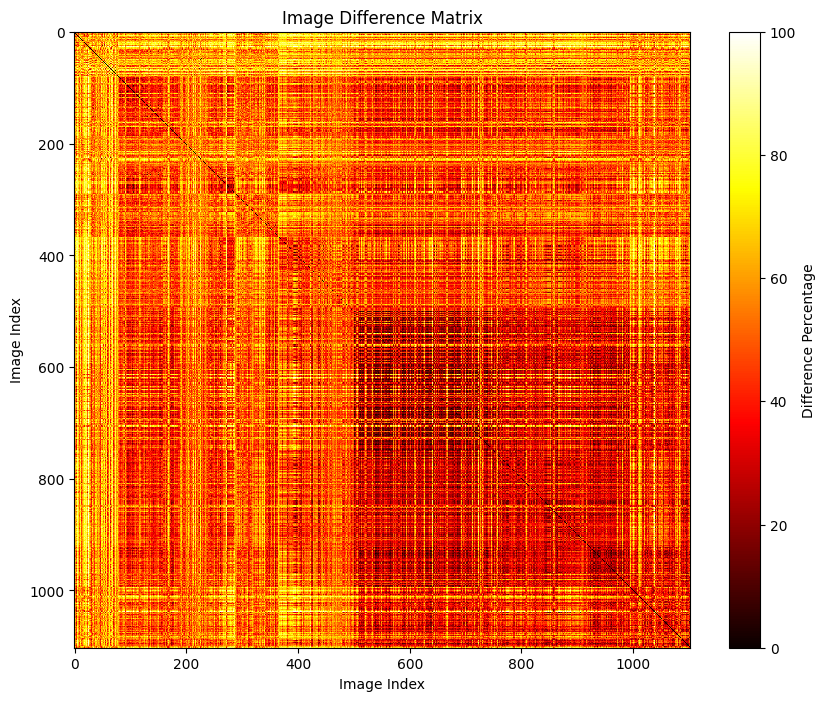

In [27]:
# Plota a matriz de diferenças
plt.figure(figsize=(10, 8))
plt.imshow(diff_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Difference Percentage')
plt.title('Image Difference Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()
